# 5.1 QP_Free
程序功能：无约束二次规划示例

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
H = np.array([[1., 0.],
              [0., 1.]])
f = np.array([1., 1.])

# 求解二次规划问题
u = -np.linalg.inv(H) @ f
u

array([-1., -1.])

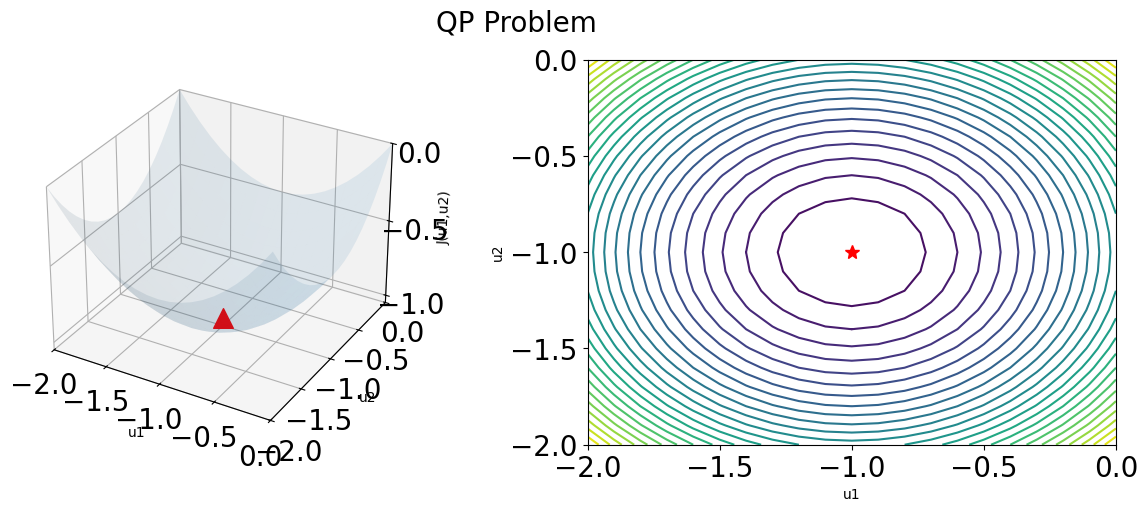

In [3]:
# 创建一个图窗口并定义大小
plt.figure(1, figsize=(15, 5))

# 绘制二次规划问题的可行域和最优解点（3D图）
U1, U2 = np.meshgrid(np.arange(-2, 0.1, 0.1), np.arange(-2, 0.1, 0.1))
J = 0.5 * (U1**2 + U2**2) + U1 + U2

# 子图1: 3D曲面图
ax1 = plt.subplot(1, 2, 1, projection='3d')
ax1.plot_surface(U1, U2, J, alpha=0.1)
ax1.scatter(u[0], u[1], 0.5 * (u[0]**2 + u[1]**2) + u[0] + u[1], color='red', s=200, marker='^')
ax1.set_xlabel('u1')
ax1.set_ylabel('u2')
ax1.set_zlabel('J(u1,u2)')
ax1.set_xlim([-2, 0])
ax1.set_ylim([-2, 0])
ax1.set_zlim([-1.05, 0])
ax1.tick_params(labelsize=20)

# 子图2: 等高线图
ax2 = plt.subplot(1, 2, 2)
ax2.contour(U1, U2, J, 30)
ax2.plot(u[0], u[1], 'r*', markersize=10)
ax2.set_xlabel('u1')
ax2.set_ylabel('u2')
ax2.tick_params(labelsize=20)

# 设置整体标题
plt.suptitle('QP Problem', fontsize=20)

# 显示图形
plt.show()

# 5.2 QP_EQconstraint
程序功能：等式约束二次规划示例

In [4]:
# 定义二次规划问题的H, f, Meq
H = np.array([[1., 0.],
              [0., 1.]])
f = np.array([[1.],
              [1.]])
n = H.shape[0]

# 定义等式约束的Meq和beq
Meq = np.array([[1., -1.]])
beq = np.array([[1.]])
m = Meq.shape[0]

In [5]:
# 求解二次规划问题
KKT_matrix = np.block([[H, Meq.T],
                       [Meq, np.zeros((m, m))]])
rhs = np.vstack((-f, beq))
u_lamda = np.linalg.inv(KKT_matrix) @ rhs
u = u_lamda[:n]

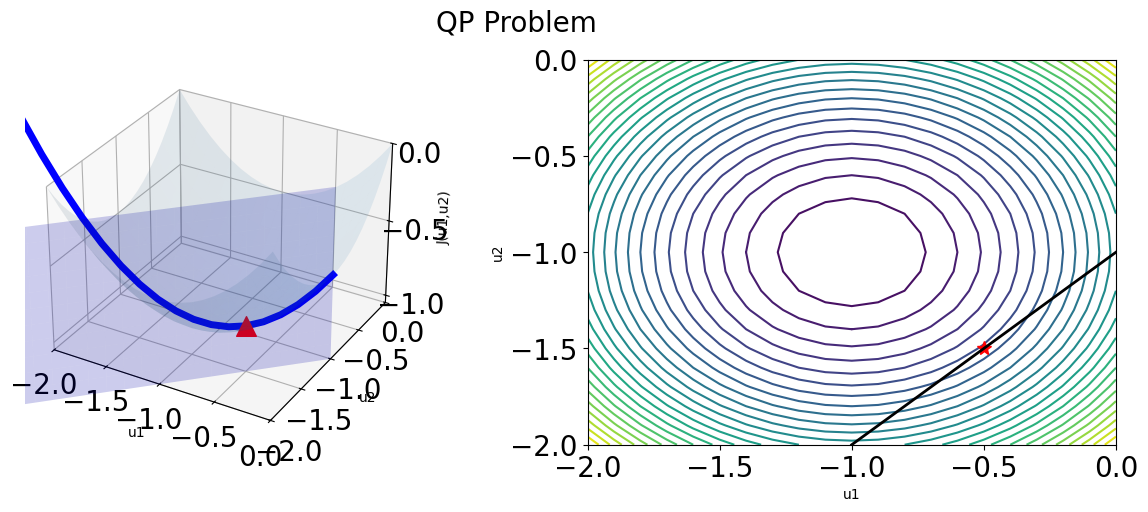

In [6]:
# 创建一个图窗口并定义大小
plt.figure(1, figsize=(15, 5))

# 绘制二次规划问题的可行域和最优解点（3D图）
U1, U2 = np.meshgrid(np.arange(-2, 0.1, 0.1), np.arange(-2, 0.1, 0.1))
J = 0.5 * (U1**2 + U2**2) + U1 + U2

# 子图1: 3D曲面图
ax1 = plt.subplot(1, 2, 1, projection='3d')
ax1.plot_surface(U1, U2, J, alpha=0.1)
u1_proj = np.arange(-2, 0.1, 0.1)
u2_proj = u1_proj - 1
J_proj = 0.5 * (u1_proj ** 2 + u2_proj ** 2) + u1_proj + u2_proj
ax1.plot(u1_proj, u2_proj, J_proj, 'b', linewidth=5)
ax1.scatter(u[0], u[1], 0.5 * (u[0]**2 + u[1]**2) + u[0] + u[1], color='red', s=200, marker='^')
U1_proj, J_proj_mesh = np.meshgrid(u1_proj, np.arange(-1.05, 0.1, 0.1))
U2_proj = U1_proj - 1
ax1.plot_surface(U1_proj, U2_proj, J_proj_mesh, color='blue', alpha=0.2, edgecolor='none')
ax1.set_xlabel('u1')
ax1.set_ylabel('u2')
ax1.set_zlabel('J(u1,u2)')
ax1.set_xlim([-2, 0])
ax1.set_ylim([-2, 0])
ax1.set_zlim([-1.05, 0])
ax1.tick_params(labelsize=20)

# 子图2: 等高线图
ax2 = plt.subplot(1, 2, 2)
ax2.contour(U1, U2, J, 30)
ax2.plot(u[0], u[1], 'r*', markersize=10)
u1_con = np.arange(-1.0, 0.1, 0.1)
u2_con = u1_con - 1
ax2.plot(u1_con, u2_con, 'k', linewidth=2)
ax2.set_xlabel('u1')
ax2.set_ylabel('u2')
ax2.tick_params(labelsize=20)

# 设置整体标题
plt.suptitle('QP Problem', fontsize=20)

# 显示图形
plt.show()

# 5.3 QP_nonEQconstraint
程序功能：不等式约束二次规划示例

In [7]:
from scipy.optimize import minimize

# 定义二次规划问题的H和f
H = np.array([[1., 0.], 
              [0., 1.]])
f = np.array([1., 1.])

def objective(u):
    return 0.5 * np.dot(u.T, np.dot(H, u)) + np.dot(f.T, u)

# 定义不等式约束的A和b
A = np.array([[-1., 1.], 
              [1., 1.]])
b = np.array([1., 2.])
cons = ({'type': 'ineq', 'fun': lambda u:  b - np.dot(A, u)})

# 定义变量边界
bounds = [(0., 1.), (0., 2.)]

In [8]:
options = {'disp': False}
result = minimize(objective, np.zeros(2), method='SLSQP', bounds=bounds, constraints=cons, options=options)
u = result.x
J = result.fun
u,J

(array([0., 0.]), 0.0)

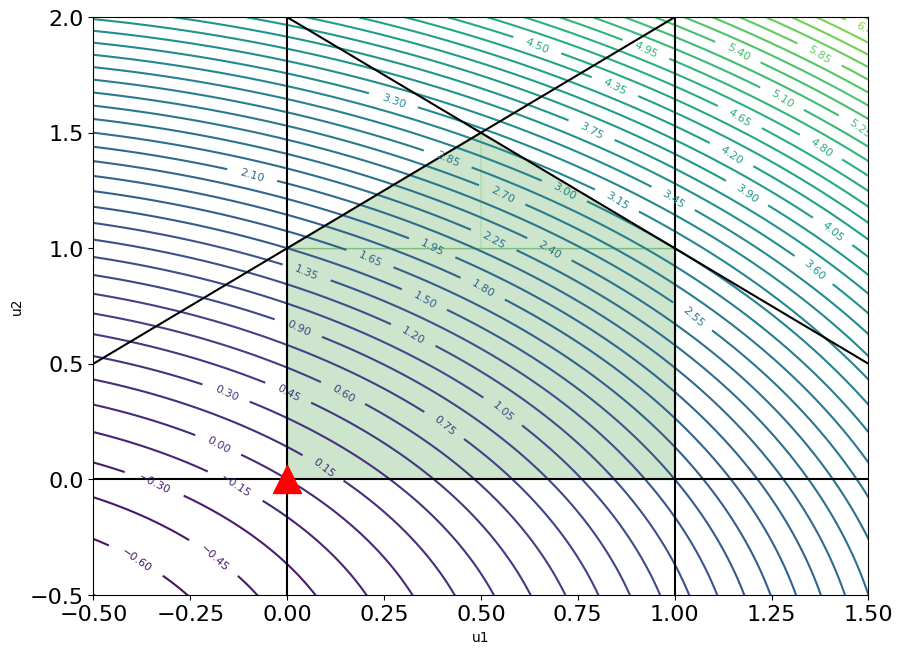

In [9]:
# Plot contour and feasible region
plt.figure(figsize=(10, 7.5))

# Plot contour
U1, U2 = np.meshgrid(np.linspace(-1, 2, 300), np.linspace(-1, 2, 300))
Z = 0.5 * (U1**2 + U2**2) + U1 + U2
contour = plt.contour(U1, U2, Z, 60)
plt.clabel(contour, inline=1, fontsize=8)

# Plot feasible region
plt.plot([-0.5, 1], [0.5, 2], 'k', linewidth=1.5)
plt.plot([0, 1.5], [2, 0.5], 'k', linewidth=1.5)
plt.axvline(x=0, color='k', linewidth=1.5)
plt.axhline(y=0, color='k', linewidth=1.5)
plt.axvline(x=1, color='k', linewidth=1.5)
plt.fill_betweenx([1, 1.5, 1], [0., 0.5, 0.5], [0.5, 0.5, 1], color='green', alpha=0.2)
plt.fill_between([0, 1], 0, 1, color='green', alpha=0.2)

# Plot the optimum point
plt.plot(u[0], u[1], 'r^', markersize=20, markerfacecolor='red')

# Add axis labels and title
plt.xlabel('u1')
plt.ylabel('u2')
plt.xlim([-0.5, 1.5])
plt.ylim([-0.5, 2])

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

# 5.4 F4_MPC_Matrices_PM
模块功能：
- 求解模型预测控制中二次规划所需矩阵F，H
- 求解模型预测控制一系列中间过程矩阵Phi，Gamma，Omega，Psi

In [10]:
from scipy.linalg import block_diag, toeplitz

def F4_MPC_Matrices_PM(A, B, Q, R, S, N_P):
    n = A.shape[0]
    p = B.shape[1]

    Phi = np.zeros((N_P*n, n))
    Gamma = np.zeros((N_P*n, N_P*p))

    for i in range(N_P):
        Phi[i*n:(i+1)*n, :] = np.linalg.matrix_power(A, i+1)
        for j in range(i + 1): 
            Gamma[i*n:(i+1)*n, j*p:(j+1)*p] = np.linalg.matrix_power(A, i - j) @ B

    Omega = np.kron(np.eye(N_P-1), Q)
    Omega = block_diag(Omega, S)

    Psi = np.kron(np.eye(N_P), R)

    F = Gamma.T @ Omega @ Phi
    H = Psi + Gamma.T @ Omega @ Gamma

    return Phi, Gamma, Omega, Psi, F, H

# 5.5 F5_MPC_Controller_noConstraints
模块功能：利用二次规划求解模型预测控制中的系统控制量

In [11]:
def F5_MPC_Controller_noConstraints(x, F, H, p):

    def objective(U):
        return 0.5 * np.dot(U.T, np.dot(H, U)) + np.dot((F @ x).T, U)

    U0 = np.zeros((len(H),))

    options = {'maxiter': 200, 'disp': False}
    result = minimize(objective, U0, method='SLSQP', options=options)

    U = result.x

    # Extract the first p elements as the control action
    u = U[:p]

    return U, u

# 5.6 MPC_1D
程序功能：模型预测控制一维示例

In [12]:
# 定义系统参数
A = np.array([[1.]])
B = np.array([[1.]])
Q = np.array([[1.]])
S = np.array([[1.]])
R = np.array([[1.]])

p = B.shape[1]

x_0 = np.array([[1.]])
x = x_0
x2 = x_0

k_steps = 5
N_P = 5  # 预测区间

In [13]:
Phi, Gamma, Omega, Psi, F, H = F4_MPC_Matrices_PM(A, B, Q, R, S, N_P)
U_offline, u_offline = F5_MPC_Controller_noConstraints(x, F, H, p)
U_offline, u_offline

(array([-0.61789946, -0.23607642, -0.08987368, -0.03368231, -0.01130746]),
 array([-0.61789946]))

In [14]:
x_history = np.zeros((n, k_steps + 1))
x_history_2 = np.zeros((n, k_steps + 1))
u_history = np.zeros((p, k_steps))
u_history_2 = np.zeros((p, k_steps))

x_history[:, 0] = x
x_history_2[:, 0] = x2

for k in range(k_steps):
    U, u = F5_MPC_Controller_noConstraints(x, F, H, p)
    x = A * x + B * u
    if k == 1:
        x += 0.2
    x_history[:, k + 1] = x
    u_history[:, k] = u

    # 离线控制输入
    u_offline = U_offline[k]
    x2 = A * x2 + B * u_offline
    if k == 1:
        x2 += 0.2
    x_history_2[:, k + 1] = x2
    u_history_2[:, k] = u_offline

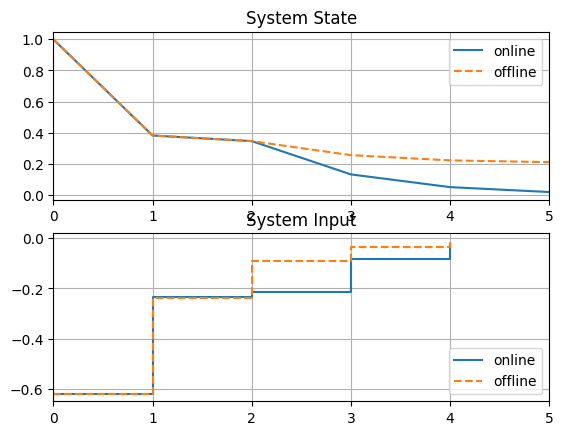

In [15]:
# 系统状态结果视图 在线vs.离线
plt.subplot(2, 1, 1)
plt.plot(x_history[0], label="online")
plt.plot(x_history_2[0], '--', label="offline")
plt.grid(True)
plt.legend()
plt.xlim([0, k_steps])
plt.title('System State')

# 系统输入结果视图 在线vs.离线
plt.subplot(2, 1, 2)
plt.step(range(k_steps), u_history[0], where='post', label="online")
plt.step(range(k_steps), u_history_2[0], '--', where='post', label="offline")
plt.legend(loc='lower right')
plt.grid(True)
plt.xlim([0, k_steps])
plt.title('System Input')

plt.show()

# 5.7 MPC_MSD_SS_U
程序功能：弹簧质量阻尼系统模型预测控制-稳态输入

In [16]:
from scipy.signal import dlti, dstep, lti

# 系统参数定义
m_sys = 1.0  # 质量块质量
b_sys = 0.5  # 阻尼系数
k_sys = 1.0  # 弹簧弹性系数

# 系统矩阵构建
A = np.array([[0., 1.], 
              [-k_sys / m_sys, -b_sys / m_sys]])
n = A.shape[1]  # A矩阵维度
B = np.array([[0.], 
              [1. / m_sys]])
p = B.shape[1]  # B矩阵维度

C = np.array([[1, 0]])  # Assuming we are interested in the position 'x'
D = np.array([[0]])

# 系统离散化
Ts = 0.1
sys_c = lti(A, B, C, D)
sys_d = sys_c.to_discrete(Ts)
A = sys_d.A
B = sys_d.B

# 权重设计
Q = np.eye(n)
S = np.eye(n)
R = np.array([[1.]])

# 系统参考输入（目标值）
xd = np.array([[1.], [0.]])
AD = np.eye(n)

In [17]:
def F2_InputAugmentMatrix_SS_U(A, B, Q, R, S, xd):
    n = A.shape[1]
    p = B.shape[1]

    Ca = np.block([np.eye(n), -np.eye(n)])
    Aa = np.block([
        [A, np.eye(n) - A],
        [np.zeros((n, n)), np.eye(n)]
    ])
    Ba = np.block([
        [B],
        [np.zeros((n, p))]
    ])
    Qa = Ca.T @ Q @ Ca

    Sa = Ca.T @ S @ Ca

    ud, _, _, _ = np.linalg.lstsq(B, (np.eye(n) - A) @ xd, rcond=None)  # ud = np.linalg.pinv(B) @ ((np.eye(n) - A) @ xd)

    return Aa, Ba, Qa, Sa, R, ud

In [18]:
Aa, Ba, Qa, Sa, R, ud = F2_InputAugmentMatrix_SS_U(A, B, Q, R, S, xd)
print("稳态输出为：", ud)

稳态输出为： [[1.]]


In [19]:
Phi, Gamma, Omega, Psi, F, H = F4_MPC_Matrices_PM(Aa, Ba, Qa, R, Sa, N_P)

In [20]:
# 系统初始化
x0 = np.array([[0.], [0.]])
x = x0
xa = np.vstack((x, xd))

# 仿真
k_steps = 100
x_history = np.zeros((n, k_steps + 1))
u_history = np.zeros((p, k_steps))
x_history[:, 0] = x.flatten()

for k in range(k_steps):
    delta_U, delta_u = F5_MPC_Controller_noConstraints(xa, F, H, p)
    x = A.dot(x) + B.dot(delta_u + ud)
    xa = np.vstack((x, xd))
    x_history[:, k + 1] = x.flatten()
    u_history[:, k] = delta_u + ud

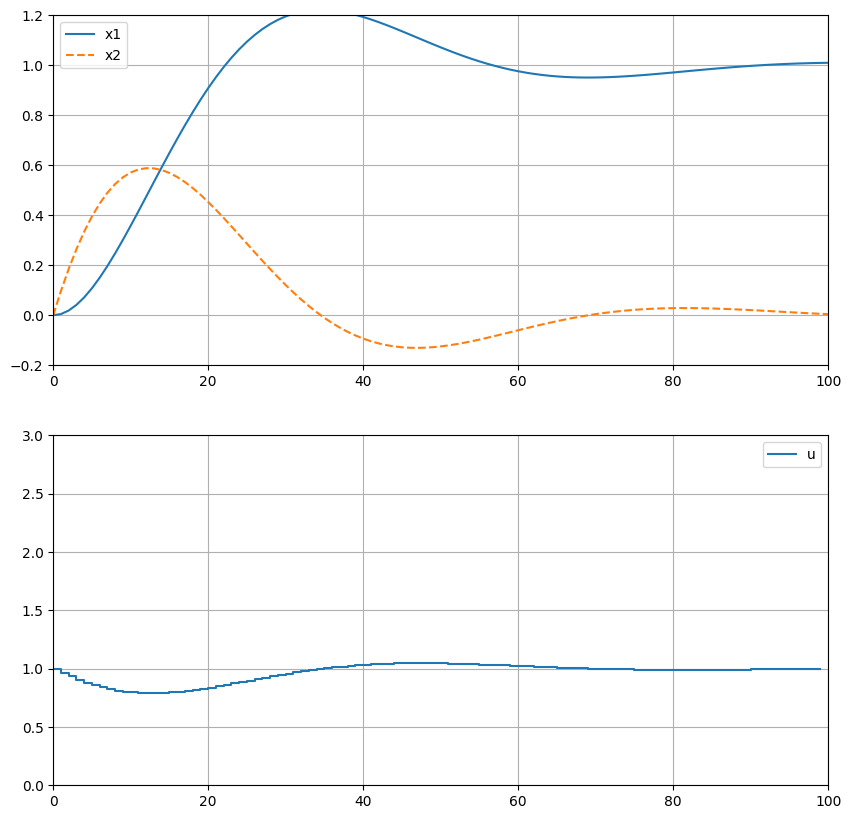

In [21]:
# Plotting results
plt.figure(figsize=(10, 10))

# Plot state variables
plt.subplot(2, 1, 1)
plt.plot(range(k_steps + 1), x_history[0, :])
plt.plot(range(k_steps + 1), x_history[1, :], '--')
plt.grid(True)
plt.legend(['x1', 'x2'])
plt.xlim([0, k_steps])
plt.ylim([-0.2, 1.2])

# Plot system input
plt.subplot(2, 1, 2)
plt.step(range(k_steps), u_history[0, :], where='post')
plt.grid(True)
plt.legend(['u'])
plt.xlim([0, k_steps])
plt.ylim([0, 3])

plt.show()

# 5.8 MPC_MSD_Delta_U
程序功能：弹簧质量阻尼系统模型预测控制-输入增量

In [22]:
from scipy.signal import dlti, dstep, lti

# 系统参数定义
m_sys = 1.0  # 质量块质量
b_sys = 0.5  # 阻尼系数
k_sys = 1.0  # 弹簧弹性系数

# 系统矩阵构建
A = np.array([[0., 1.], 
              [-k_sys / m_sys, -b_sys / m_sys]])
n = A.shape[1]  # A矩阵维度
B = np.array([[0.], 
              [1. / m_sys]])
p = B.shape[1]  # B矩阵维度

C = np.array([[1, 0]])  # Assuming we are interested in the position 'x'
D = np.array([[0]])

# 系统离散化
Ts = 0.1
sys_c = lti(A, B, C, D)
sys_d = sys_c.to_discrete(Ts)
A = sys_d.A
B = sys_d.B

# 权重设计
Q = np.eye(n)
S = np.eye(n)
R = np.array([[0.1]])

# 系统参考输入（目标值）
xd = np.array([[1.], [0.]])
AD = np.eye(n)

In [23]:
def F3_InputAugmentMatrix_Delta_U(A, B, Q, R, S, AD):
    n = A.shape[1]
    p = B.shape[1]
    Ca = np.block([np.eye(n), -np.eye(n), np.zeros((n, p))])
    Aa = np.block([
        [A, np.zeros((n, n)), B],
        [np.zeros((n, n)), AD, np.zeros((n, p))],
        [np.zeros((p, n)), np.zeros((p, n)), np.eye(p)]
    ])
    Ba = np.block([
        [B],
        [np.zeros((n, p))],
        [np.eye(p)]
    ])
    Qa = Ca.T @ Q @ Ca
    Sa = Ca.T @ S @ Ca

    return Aa, Ba, Qa, Sa, R

In [24]:
Aa, Ba, Qa, Sa, R = F3_InputAugmentMatrix_Delta_U(A, B, Q, R, S, AD)

In [25]:
N_P = 20
Phi, Gamma, Omega, Psi, F, H = F4_MPC_Matrices_PM(Aa, Ba, Qa, R, Sa, N_P)

In [26]:
# 系统初始化
x0 = np.array([[0.], [0.]])
x = x0
u0 = np.array([0.])
u = u0
xa = np.vstack([x, xd, u])

# 仿真
k_steps = 100
x_history = np.zeros((n, k_steps+1))
u_history = np.zeros((p, k_steps))
x_history[:, 0] = x.flatten()

for k in range(k_steps):
    Delta_U, Delta_u = F5_MPC_Controller_noConstraints(xa, F, H, p)
    u += Delta_u
    x = A.dot(x) + B.dot(np.array([u]))
    xa = np.vstack([x, xd, u])
    x_history[:, k+1] = x.flatten()
    u_history[:, k] = u.flatten()

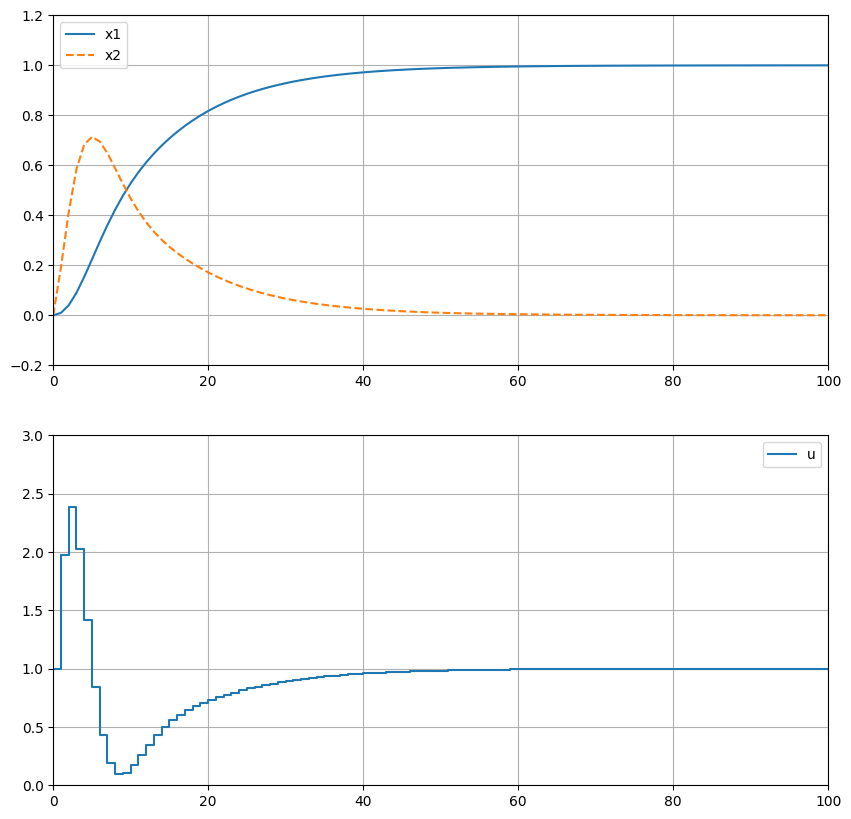

In [27]:
# Plotting results
plt.figure(figsize=(10, 10))

# Plot state variables
plt.subplot(2, 1, 1)
plt.plot(x_history[0, :], label="x1")
plt.plot(x_history[1, :], '--', label="x2")
plt.grid(True)
plt.legend()
plt.xlim([0, k_steps])
plt.ylim([-0.2, 1.2])

# Plot system input
plt.subplot(2, 1, 2)
plt.step(range(k_steps+1), np.hstack([u0, u_history[0, :]]), where='post', label="u")
plt.grid(True)
plt.legend()
plt.xlim([0, k_steps])
plt.ylim([0, 3])

plt.show()

# 5.9 MPC_MSD_Delta_AD
程序功能：弹簧质量阻尼系统模型预测控制-输入增量非常数目标

In [28]:
from scipy.signal import cont2discrete, lti

# 系统参数定义
m_sys = 1.0  # 质量块质量
b_sys = 0.5  # 阻尼系数
k_sys = 1.0  # 弹簧弹性系数

# 系统矩阵构建
A = np.array([[0., 1.], 
              [-k_sys / m_sys, -b_sys / m_sys]])
n = A.shape[1]  # A矩阵维度
B = np.array([[0.], 
              [1. / m_sys]])
p = B.shape[1]  # B矩阵维度

C = np.array([[1., 0.]])  # Assuming we are interested in the position 'x'
D = np.array([[0.]])

# 系统离散化
Ts = 0.1
sys_c = lti(A, B, C, D)
sys_d = sys_c.to_discrete(Ts)
A = sys_d.A
B = sys_d.B

# 权重设计
Q = np.eye(n)
S = np.eye(n)
R = np.array([[0.1]])

# 目标状态和目标状态转移矩阵
xd = np.array([[0], [0.2]])
AD = cont2discrete((np.array([[0, 1], [0, 0]]), np.zeros((2, 1)), np.eye(2), np.zeros((2, 1))), Ts)[0]

In [29]:
Aa, Ba, Qa, Sa, R = F3_InputAugmentMatrix_Delta_U(A, B, Q, R, S, AD)

In [30]:
N_P = 20
Phi, Gamma, Omega, Psi, F, H = F4_MPC_Matrices_PM(Aa, Ba, Qa, R, Sa, N_P)

In [31]:
# 系统初始化
x0 = np.array([[0], [0]])
x = x0
u0 = np.array([0.])
u = u0
xa = np.vstack([x, xd, u])

# 仿真
k_steps = 200
x_history = np.zeros((n, k_steps))
u_history = np.zeros((p, k_steps))
xd_history = np.zeros((n, k_steps))

for k in range(k_steps):
    if k == 49:
        xd = np.array([xd[0], [-0.2]])
    elif k == 99:
        xd = np.array([xd[0], [0.2]])
    elif k == 149:
        xd = np.array([xd[0], [-0.2]])
    elif k == 199:
        xd = np.array([xd[0], [0.2]])

    Delta_U, Delta_u = F5_MPC_Controller_noConstraints(xa, F, H, p)
    u += Delta_u
    x = A.dot(x) + B.dot(np.array([u]))

    xd = AD.dot(xd)
    xa = np.vstack([x, xd, u])
    x_history[:, k] = x.flatten()
    u_history[:, k] = u.flatten()
    xd_history[:, k] = xd.flatten()

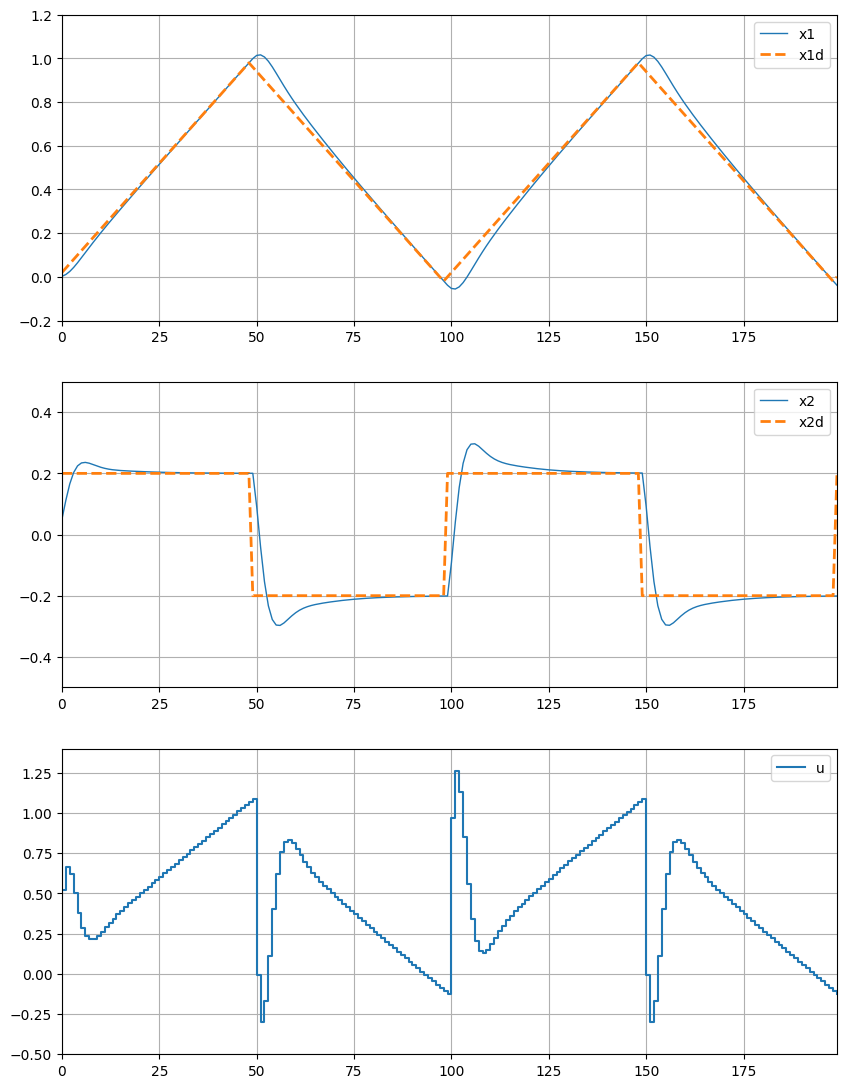

In [32]:
# Plotting results
plt.figure(figsize=(10, 13.5))

# Plot x1 with reference
plt.subplot(3, 1, 1)
plt.plot(x_history[0, :], linewidth=1)
plt.plot(xd_history[0, :], '--', linewidth=2)
plt.grid(True)
plt.legend(["x1", "x1d"])
plt.xlim([0, k_steps - 1])
plt.ylim([-0.2, 1.2])

# Plot x2 with reference
plt.subplot(3, 1, 2)
plt.plot(x_history[1, :], linewidth=1)
plt.plot(xd_history[1, :], '--', linewidth=2)
plt.grid(True)
plt.legend(["x2", "x2d"])
plt.xlim([0, k_steps - 1])
plt.ylim([-0.5, 0.5])

# Plot system input
plt.subplot(3, 1, 3)
plt.step(range(k_steps), u_history[0, :], where='post')
plt.grid(True)
plt.legend(["u"])
plt.xlim([0, k_steps - 1])
plt.ylim([-0.5, 1.4])

plt.show()

# 5.10 F6_MPC_Matrices_Constraints
模块功能：生成MPC控制器所需的约束矩阵

In [33]:
def F6_MPC_Matrices_Constraints(x_low, x_high, u_low, u_high, N_P, Phi, Gamma):

    n = x_low.shape[0]
    p = u_low.shape[0]

    M = np.vstack([np.zeros((p, n)), 
                   np.zeros((p, n)), 
                   -np.eye(n), 
                   np.eye(n)])
    
    F = np.vstack([-np.eye(p), 
                   np.eye(p), 
                   np.zeros((n, p)), 
                   np.zeros((n, p))])
    
    Beta = np.vstack([-u_low, 
                      u_high, 
                      -x_low, 
                      x_high])
    
    M_Np = np.vstack([-np.eye(n), 
                      np.eye(n)])
    
    Beta_N = np.vstack([-x_low, 
                        x_high])

    
    M_bar = np.zeros(((2*n+2*p)*N_P+2*n, n))
    M_bar[:(2*n+2*p), :] = M

    
    Beta_bar = np.tile(Beta, (N_P, 1))
    Beta_bar = np.vstack([Beta_bar, Beta_N])

    M_2bar = M
    F_2bar = F
    for i in range(1, N_P-1):
        M_2bar = np.block([[M_2bar, np.zeros((M_2bar.shape[0], M.shape[1]))], 
                           [np.zeros((M.shape[0], M_2bar.shape[1])), M]])
        F_2bar = np.block([[F_2bar, np.zeros((F_2bar.shape[0], F.shape[1]))], 
                           [np.zeros((F.shape[0], F_2bar.shape[1])), F]])

    M_2bar = np.block([
        [np.zeros((2*n+2*p, n*N_P))],
        [M_2bar, np.zeros((M_2bar.shape[0], n))],
        [np.zeros((M_Np.shape[0], M_2bar.shape[1])), M_Np]
    ])
    F_2bar = np.block([[F_2bar, np.zeros((F_2bar.shape[0], F.shape[1]))], 
                           [np.zeros((F.shape[0], F_2bar.shape[1])), F]])
    F_2bar = np.block([[F_2bar], 
                       [np.zeros((2*n, p*N_P))]])

    b = -(M_bar + np.dot(M_2bar, Phi))
    
    M = np.dot(M_2bar, Gamma) + F_2bar
    
    return M, Beta_bar, b


# 5.11 F7_MPC_Controller_withConstriants
模块功能：利用二次规划求解模型预测控制中的系统控制量-含约束

In [34]:
import numpy as np
from qpsolvers import solve_qp

def F7_MPC_Controller_withConstriants(x, F, H, M, Beta_bar, b, p):

    P = H
    q = F @ x
    G = M
    h = Beta_bar + b @ x

    # 解二次规划
    U = solve_qp(P, q, G, h, solver="quadprog")
    # 选择控制序列的第一组元素
    u = U[:p]
    return U, u

# 5.12 MPC_2D
程序功能：模型预测控制二维系统示例

In [35]:
# 系统定义
A = np.array([[1., 0.1], 
              [0., -2.]])
B = np.array([[0., 0.2], 
              [-0.1, 0.5]])

n = A.shape[1]
p = B.shape[1]

# 权重设计
Q = np.eye(n)
S = np.eye(n)
R = np.array([[0.1, 0.], 
              [0., 0.1]])

In [36]:
# 系统约束
x_low = np.array([[-np.inf], 
                  [-np.inf]])
x_high = np.array([[np.inf], 
                   [0.]])
u_low = np.array([[-np.inf], 
                  [-3.]])
u_high = np.array([[np.inf], 
                   [np.inf]])

In [37]:
N_P = 2
Phi, Gamma, Omega, Psi, F, H = F4_MPC_Matrices_PM(A, B, Q, R, S, N_P)
print("F=", F)
print("H=", H)

F= [[-0.01   1.001]
 [ 0.45  -5.005]
 [ 0.    -0.4  ]
 [ 0.2    1.98 ]]
H= [[ 0.1501 -0.2525 -0.02    0.098 ]
 [-0.2525  1.4525  0.1    -0.45  ]
 [-0.02    0.1     0.11   -0.05  ]
 [ 0.098  -0.45   -0.05    0.39  ]]


In [38]:
M, Beta_bar, b = F6_MPC_Matrices_Constraints(x_low, x_high, u_low, u_high, N_P, Phi, Gamma)
print("M.shape=", M.shape)
print("M=", M)
print("Beta_bar.shape=", Beta_bar.shape)
print("Beta_bar=", Beta_bar)
print("b.shape=", b.shape)
print("b=", b)

M.shape= (20, 4)
M= [[-1.    0.    0.    0.  ]
 [ 0.   -1.    0.    0.  ]
 [ 1.    0.    0.    0.  ]
 [ 0.    1.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.   -1.    0.  ]
 [ 0.    0.    0.   -1.  ]
 [ 0.    0.    1.    0.  ]
 [ 0.    0.    0.    1.  ]
 [ 0.   -0.2   0.    0.  ]
 [ 0.1  -0.5   0.    0.  ]
 [ 0.    0.2   0.    0.  ]
 [-0.1   0.5   0.    0.  ]
 [ 0.01 -0.25  0.   -0.2 ]
 [-0.2   1.    0.1  -0.5 ]
 [-0.01  0.25  0.    0.2 ]
 [ 0.2  -1.   -0.1   0.5 ]]
Beta_bar.shape= (20, 1)
Beta_bar= [[inf]
 [ 3.]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [ 0.]
 [inf]
 [ 3.]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [ 0.]
 [inf]
 [inf]
 [inf]
 [ 0.]]
b.shape= (20, 2)
b= [[-0.  -0. ]
 [-0.  -0. ]
 [-0.  -0. ]
 [-0.  -0. ]
 [ 1.  -0. ]
 [-0.   1. ]
 [-1.  -0. ]
 [-0.  -1. ]
 [-0.  -0. ]
 [-0.  -0. ]
 [-0.  -0. ]
 [-0.  -0. ]
 [ 1.   0.1]
 [-0.  -2. ]
 [-1.  -0.1]
 [-0.   2. ]
 [ 1.  -0.1]
 [-0.   4. ]
 [-1.   0.

In [39]:
# 系统初始化
# System initialization
x_0 = np.array([[1.], 
                [-1.]])
x = x_0

# 仿真
k_steps = 10
x_history = np.zeros((n, k_steps+1))
x_history[:, 0] = x[:, 0]
u_history = np.zeros((p, k_steps))

for k in range(k_steps):
    U, u = F7_MPC_Controller_withConstriants(x, F, H, M, Beta_bar, b, p)
    x = A @ x + B @ u.reshape((p, 1))
    # Save system state and input to predefined matrices
    x_history[:, k+1] = x.flatten()
    u_history[:, k] = u

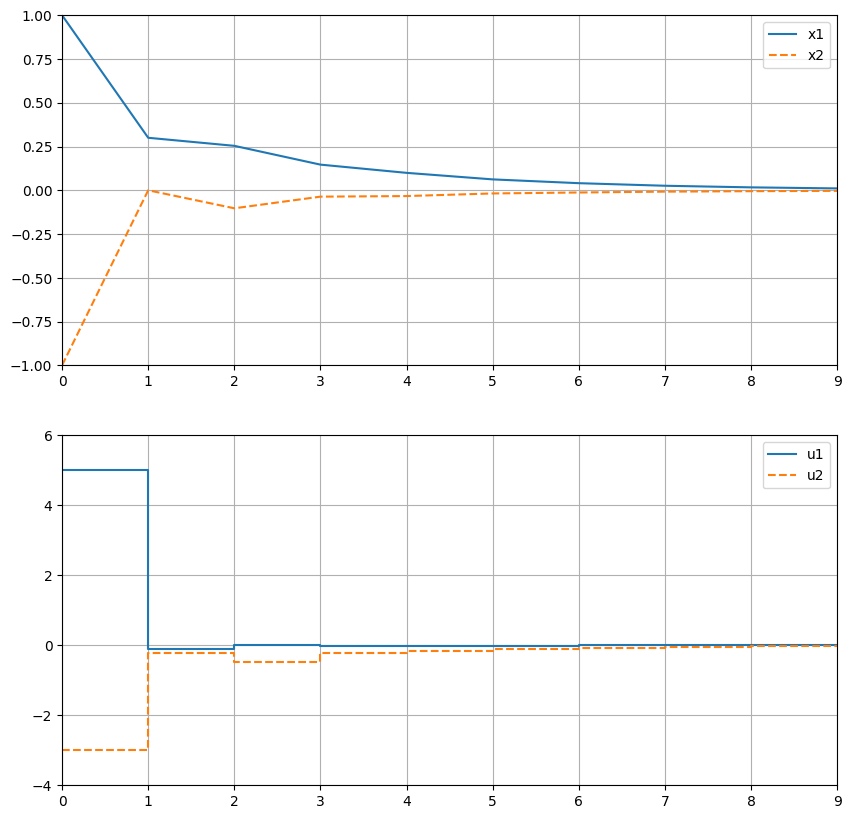

In [40]:
# Plot results
plt.figure(figsize=(10, 10))
# Plot system state results
plt.subplot(2, 1, 1)
plt.plot(x_history[0, :], label='x1')
plt.plot(x_history[1, :], '--', label='x2')
plt.legend()
plt.grid(True)
plt.xlim([0, k_steps - 1])
plt.ylim([-1, 1])

# Plot system input results
plt.subplot(2, 1, 2)
plt.step(range(k_steps), u_history[0, :], where='post', label='u1')
plt.step(range(k_steps), u_history[1, :], where='post', linestyle='--', label='u2')
plt.legend()
plt.grid(True)
plt.xlim([0, k_steps - 1])
plt.ylim([-4, 6])
plt.show()

# 5.13 MPC_MSD_SS_U_withConstraints
程序功能：弹簧质量阻尼系统模型预测控制示例-用约束限制超调量

In [41]:
from scipy.signal import dlti, dstep, lti

# 系统参数定义
m_sys = 1.0  # 质量块质量
b_sys = 0.5  # 阻尼系数
k_sys = 1.0  # 弹簧弹性系数

# 系统矩阵构建
A = np.array([[0., 1.], 
              [-k_sys / m_sys, -b_sys / m_sys]])
n = A.shape[1]  # A矩阵维度
B = np.array([[0.], 
              [1. / m_sys]])
p = B.shape[1]  # B矩阵维度

C = np.array([[1., 0.]])  # Assuming we are interested in the position 'x'
D = np.array([[0.]])

# 系统离散化
Ts = 0.1
sys_c = lti(A, B, C, D)
sys_d = sys_c.to_discrete(Ts)
A = sys_d.A
B = sys_d.B

# 权重设计
Q = np.eye(n)
S = np.eye(n)
R = np.array([[1.]])

In [42]:
# 系统参考值（目标值）
xd = np.array([[1.], 
               [0.]])
AD = np.eye(n)
ud, _, _, _ = np.linalg.lstsq(B, (np.eye(n) - A) @ xd, rcond=None)

In [43]:
# 系统限制
u_low = np.array([-np.inf])
u_high = np.array([np.inf])
x_low = np.array([[0.], 
                  [-np.inf]])
x_high = np.array([[1.], 
                   [np.inf]])
xa_low = np.vstack([x_low, -np.inf * np.ones((n, 1))])
xa_high = np.vstack([x_high, np.inf * np.ones((n, 1))])

In [44]:
N_P = 20
Aa, Ba, Qa, Sa, R, ud = F2_InputAugmentMatrix_SS_U(A, B, Q, R, S, xd)
Phi, Gamma, Omega, Psi, F, H = F4_MPC_Matrices_PM(Aa, Ba, Qa, R, Sa, N_P)
M, Beta_bar, b = F6_MPC_Matrices_Constraints(xa_low, xa_high, u_low, u_high, N_P, Phi, Gamma)

In [45]:
# 仿真初始化
x0 = np.zeros((n, 1))
x = x0
xa = np.vstack([x, xd])

k_steps = 100
x_history = np.zeros((n, k_steps + 1))
u_history = np.zeros((p, k_steps))
x_history[:, 0] = x.flatten()
x_history_noconstraint = np.zeros((n, k_steps + 1))
u_history_noconstraint = np.zeros((p, k_steps))
x_history_noconstraint[:, 0] = x.flatten()

In [46]:
# 仿真
for k in range(k_steps):
    delta_U, delta_u = F7_MPC_Controller_withConstriants(xa, F, H, M, Beta_bar, b, p)
    u = delta_u + ud
    x = A @ x + B @ u
    xa = np.vstack([x, xd])
    x_history[:, k + 1] = x.flatten()
    u_history[:, k] = u.flatten()

x = x0
xa = np.vstack([x, xd])

for k in range(k_steps):
    delta_U, delta_u = F5_MPC_Controller_noConstraints(xa, F, H, p)
    x = A @ x + B @ (delta_u + ud)
    xa = np.vstack([x, xd])
    x_history_noconstraint[:, k + 1] = x.flatten()
    u_history_noconstraint[:, k] = (delta_u + ud).flatten()
    

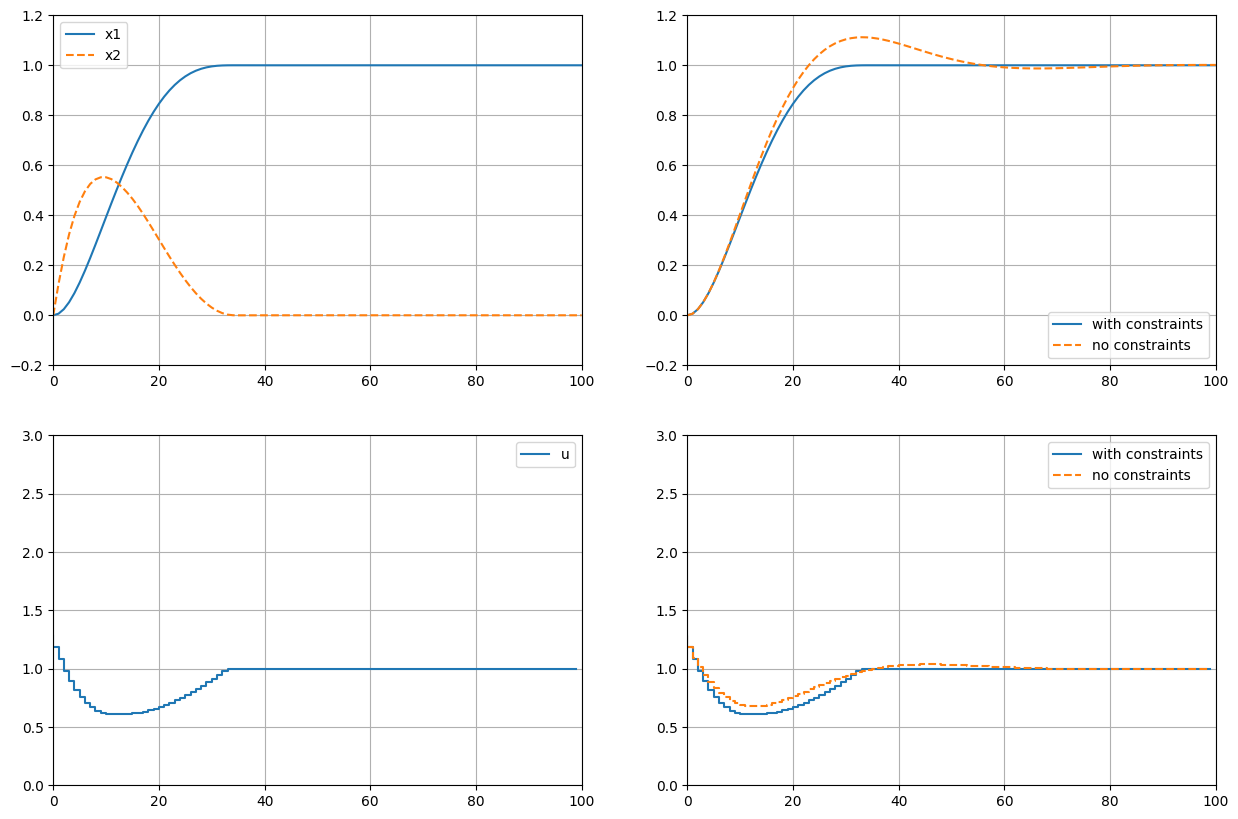

In [47]:
# 结果
plt.figure(figsize=(15, 10))

# 状态变量结果图
plt.subplot(2, 2, 1)
plt.plot(x_history[0, :])
plt.plot(x_history[1, :], '--')
plt.grid(True)
plt.legend(["x1", "x2"])
plt.xlim([0, k_steps])
plt.ylim([-0.2, 1.2])

# 系统输入结果图
plt.subplot(2, 2, 3)
plt.step(range(k_steps), u_history[0, :])
plt.legend(["u"])
plt.grid(True)
plt.xlim([0, k_steps])
plt.ylim([0, 3])

# 状态X1对比图
plt.subplot(2, 2, 2)
plt.plot(x_history[0, :])
plt.plot(x_history_noconstraint[0, :], '--')
plt.grid(True)
plt.legend(["with constraints", "no constraints"])
plt.xlim([0, k_steps])
plt.ylim([-0.2, 1.2])

# 系统输入对比图
plt.subplot(2, 2, 4)
plt.step(range(k_steps), u_history[0, :])
plt.step(range(k_steps), u_history_noconstraint[0, :], '--')
plt.legend(["with constraints", "no constraints"])
plt.grid(True)
plt.xlim([0, k_steps])
plt.ylim([0, 3])

plt.show()

# 5.14 MPC_UAV
程序功能：无人机高度速度模型预测控制

In [48]:
# 系统参数定义
m = 1.0  # 无人机质量
g = 10.0  # 重力加速度常数

# 系统矩阵构建
A = np.array([[0., 1., 0.],
              [0., 0., 1.],
              [0., 0., 0.]])
n = A.shape[0]  # A矩阵维度
B = np.array([[0.],
              [1. / m],
              [0.]])
p = B.shape[1]  # B矩阵维度

# 系统离散化
Ts = 0.1  # 离散时间步长
sys_d = cont2discrete((A, B, np.zeros((n, 1)), np.zeros((1, 1))), Ts)
A = sys_d[0]
B = sys_d[1]

# 权重矩阵设计
Q = np.array([[1., 0., 0.],
              [0., 1., 0.],
              [0., 0., 0.]])
S = np.array([[1., 0., 0.],
              [0., 1., 0.],
              [0., 0., 0.]])
R = np.array([[0.1]])

# 系统参考值
xd = np.array([[10.],
               [0.],
               [-g]])
AD = np.eye(n)
ud, _, _, _ = np.linalg.lstsq(B, (np.eye(n) - A) @ xd, rcond=None)

# 定义系统约束
u_low = np.array([-3.])
u_high = np.array([2.])
x_low = np.array([[0.], 
                  [0.], 
                  [-g]])
x_high = np.array([[10.], 
                   [3.], 
                   [-g]])
xa_low = np.vstack((x_low, -np.inf * np.ones((n, 1))))
xa_high = np.vstack((x_high, np.inf * np.ones((n, 1))))

In [49]:
N_P = 20
Aa, Ba, Qa, Sa, R, ud = F2_InputAugmentMatrix_SS_U(A, B, Q, R, S, xd)
Phi, Gamma, Omega, Psi, F, H = F4_MPC_Matrices_PM(Aa, Ba, Qa, R, Sa, N_P)
M, Beta_bar, b = F6_MPC_Matrices_Constraints(xa_low, xa_high, u_low, u_high, N_P, Phi, Gamma)

In [50]:
# 仿真初始化
x0 = np.array([[0.],
               [0.],
               [-g]])
x = x0
xa = np.vstack([x, xd])

k_steps = 100
x_history = np.zeros((n, k_steps + 1))
u_history = np.zeros((p, k_steps))
x_history[:, 0] = x.flatten()

In [51]:
for k in range(k_steps):
    delta_U, delta_u = F7_MPC_Controller_withConstriants(xa, F, H, M, Beta_bar, b, p)
    u = delta_u + ud
    x = A @ x + B @ u
    xa = np.vstack([x, xd])
    x_history[:, k + 1] = x.flatten()
    u_history[:, k] = u.flatten()

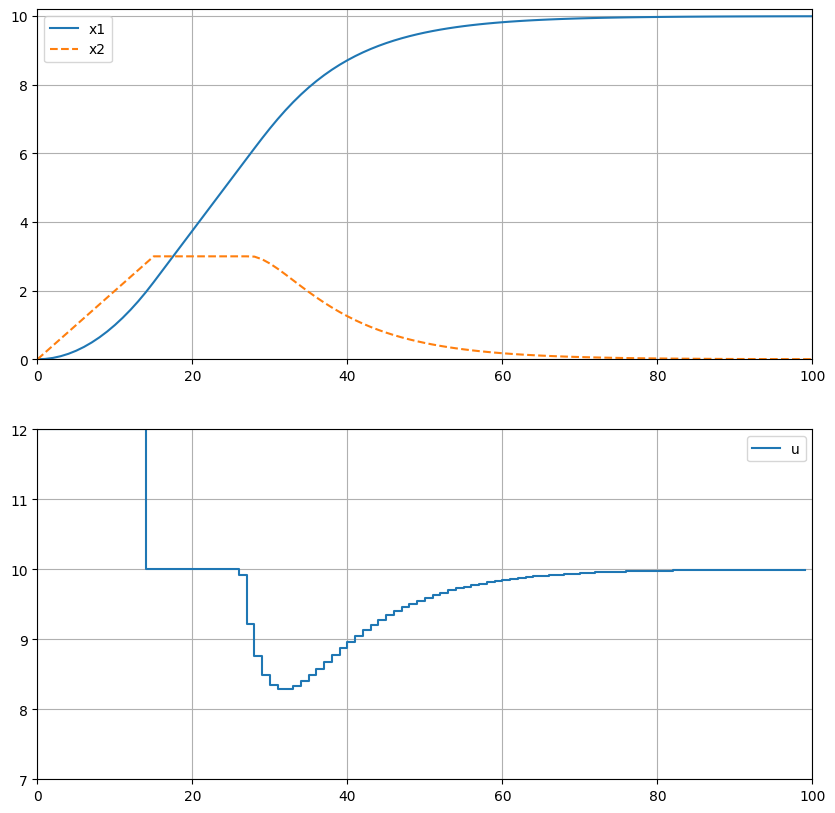

In [52]:
plt.figure(figsize=(10, 10))

# 状态变量结果图
plt.subplot(2, 1, 1)
plt.plot(x_history[0, :])
plt.plot(x_history[1, :], '--')
plt.grid(True)
plt.legend(["x1", "x2"])
plt.xlim([0, k_steps])
plt.ylim([0, 10.2])

# 系统输入
plt.subplot(2, 1, 2)
plt.step(range(k_steps), u_history[0, :])
plt.legend(["u"])
plt.grid(True)
plt.xlim([0, k_steps])
plt.ylim([7, 12])

plt.show()

# 5.15 MPC_UAV_ST_Analysis
程序功能：无人机高度速度模型预测控制

In [53]:
# 系统参数定义
m = 1.0  # 无人机质量
g = 10.0  # 重力加速度常数

# 系统矩阵构建
A = np.array([[0., 1., 0.],
              [0., 0., 1.],
              [0., 0., 0.]])
n = A.shape[0]  # A矩阵维度
B = np.array([[0.],
              [1. / m],
              [0.]])
p = B.shape[1]  # B矩阵维度

# 系统离散化
Ts = 0.1  # 离散时间步长
sys_d = cont2discrete((A, B, np.zeros((n, 1)), np.zeros((1, 1))), Ts)
A = sys_d[0]
B = sys_d[1]

# 权重矩阵设计
Q = np.array([[1., 0., 0.],
              [0., 1., 0.],
              [0., 0., 0.]])
S = np.array([[1., 0., 0.],
              [0., 1., 0.],
              [0., 0., 0.]])
R = np.array([[0.1]])

# 系统参考值
xd = np.array([[10.],
               [0.],
               [-g]])
AD = np.eye(n)
ud, _, _, _ = np.linalg.lstsq(B, (np.eye(n) - A) @ xd, rcond=None)

# 定义系统约束
u_low = np.array([-3.])
u_high = np.array([2.])
x_low = np.array([[0.], 
                  [0.], 
                  [-g]])
x_high = np.array([[10.], 
                   [3.], 
                   [-g]])
xa_low = np.vstack((x_low, -np.inf * np.ones((n, 1))))
xa_high = np.vstack((x_high, np.inf * np.ones((n, 1))))

In [54]:
N_P = 100
Aa, Ba, Qa, Sa, R, ud = F2_InputAugmentMatrix_SS_U(A, B, Q, R, S, xd)
Phi, Gamma, Omega, Psi, F, H = F4_MPC_Matrices_PM(Aa, Ba, Qa, R, Sa, N_P)
M, Beta_bar, b = F6_MPC_Matrices_Constraints(xa_low, xa_high, u_low, u_high, N_P, Phi, Gamma)

In [55]:
# 仿真初始化
x0 = np.array([[0.],
               [0.],
               [-g]])
x = x0
xa = np.vstack([x, xd])

k_steps = 100
x_history = np.zeros((n, k_steps + 1))
u_history = np.zeros((p, k_steps))
x_history[:, 0] = x.flatten()

elapsed_time_history = np.zeros(k_steps)

In [56]:
import time

for k in range(k_steps):
    start_time = time.time()
    delta_U, delta_u = F7_MPC_Controller_withConstriants(xa, F, H, M, Beta_bar, b, p)
    u = delta_u + ud
    x = A @ x + B @ u
    xa = np.vstack([x, xd])
    x_history[:, k+1] = x.flatten()
    u_history[:, k] = u.flatten()
    elapsed_time = time.time() - start_time
    elapsed_time_history[k] = elapsed_time

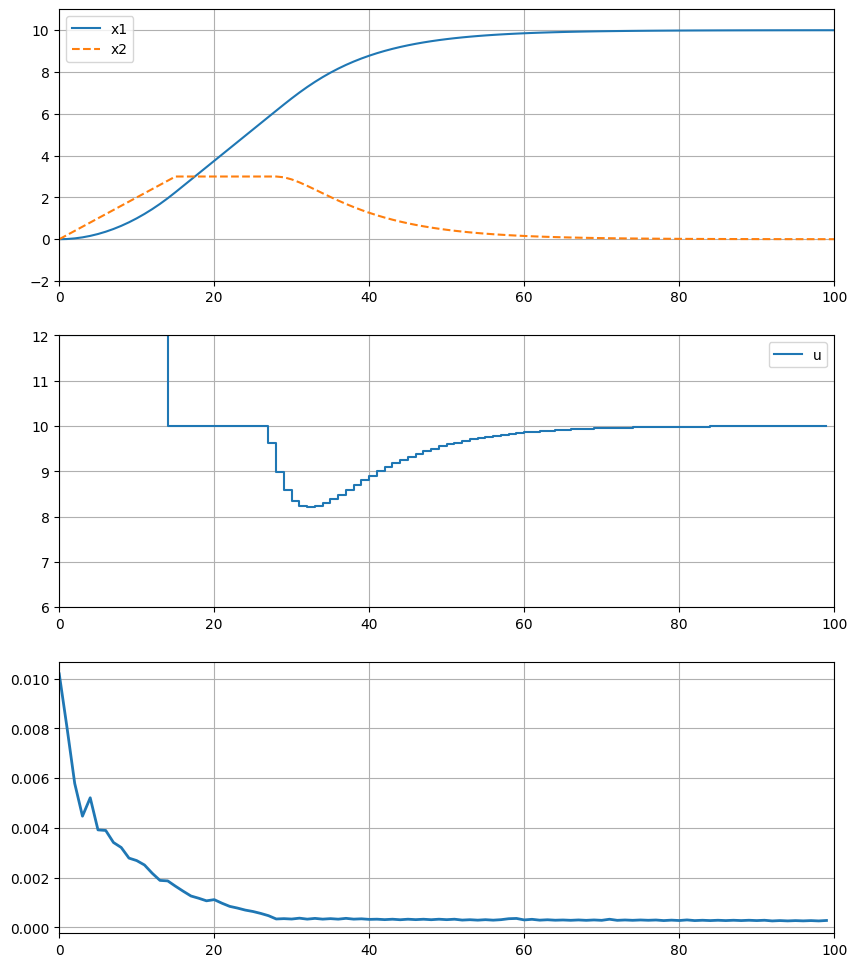

In [57]:
plt.figure(figsize=(10, 12))

# 状态变量结果图
plt.subplot(3, 1, 1)
plt.plot(x_history[0, :], label="x1")
plt.plot(x_history[1, :], '--', label="x2")
plt.grid(True)
plt.legend()
plt.xlim([0, k_steps])
plt.ylim([-2, 11])

# 系统输入
plt.subplot(3, 1, 2)
plt.step(range(k_steps), u_history[0, :], label="u")
plt.grid(True)
plt.legend()
plt.xlim([0, k_steps])
plt.ylim([6, 12])

# 系统每个迭代步计算时间
plt.subplot(3, 1, 3)
plt.plot(elapsed_time_history, linewidth=2)
plt.grid(True)
plt.xlim([0, k_steps])

plt.show()